In [1]:
import  h5py
import pandas as pd
import numpy as np
import STAGATE
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import rpy2.robjects as robjects

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

import automatic_peak_picking_2D
from automatic_peak_picking_2D import automatic_2D_peak_picking

In [2]:
os.environ['R_HOME'] = '/home/kxxiao/anaconda3/envs/sg/lib/R'
os.environ['R_USER'] = '/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/rpy2'

In [3]:
from automatic_peak_picking_3D import automatic_3D_peak_picking

In [4]:
f =  h5py.File('../aerodata_copy/3D_GBM_dataset.h5','r')
f.keys()

<KeysViewHDF5 ['3d_spatial', 'data', 'mass', 'section_id']>

In [59]:
adata=sc.AnnData(pd.DataFrame(f['data']))

adata.obs['section_id']=f['section_id']
adata.obsm['3d_spatial']=np.array(f['3d_spatial'])
adata.var_names=np.array(f['mass']).astype(str)

adata.obsm['spatial']=np.array(f['3d_spatial'])[:,0:2]

In [71]:
for i in range(len(adata.obs['section_id'])):
    adata.obs['section_id'][i]=str(adata.obs['section_id'][i],encoding='utf-8')

In [63]:
adata

AnnData object with n_obs × n_vars = 14833 × 21241
    obs: 'section_id'
    obsm: '3d_spatial', 'spatial'

In [78]:
adata.uns['section_id_colors']=['#D1DBBD','#91AA9D','#3E606F','#193441']

[]

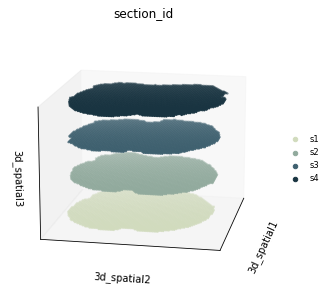

In [79]:
plt.rcParams["figure.figsize"] = (7, 5)
#ax.view_init(elev=15, azim=11)
ax=sc.pl.embedding(adata, basis="3d_spatial",color='section_id',s=100,show=False
                   ,projection='3d',legend_fontsize='small')

ax.view_init(elev=15, azim=11) 



ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

In [80]:
section_order=['s1','s2','s3','s4']
ol_mass=len(adata.var_names)
num_marker=1500
k_class=6

adata3=automatic_3D_peak_picking(adata,ol_mass=ol_mass,num_marker=num_marker,
                                 rad_cutoff_2D=1.4,rad_cutoff_Zaxis=1.4
                              ,k_class=k_class,section_order=section_order,
                                 k_class_first=4,cluster_method='mclust')

ifpicking= 1
First iter begin!


/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  UserWarning,


Radius used for 2D SNN: 1.4
Radius used for SNN between sections: 1.4
------Calculating 2D SNN of section  s1


Trying to set attribute `._uns` of view, copying.


This graph contains 13990 edges, 3570 cells.
3.9188 neighbors per cell on average.
------Calculating 2D SNN of section  s2


Trying to set attribute `._uns` of view, copying.


This graph contains 14450 edges, 3687 cells.
3.9192 neighbors per cell on average.
------Calculating 2D SNN of section  s3


Trying to set attribute `._uns` of view, copying.


This graph contains 14036 edges, 3583 cells.
3.9174 neighbors per cell on average.
------Calculating 2D SNN of section  s4


Trying to set attribute `._uns` of view, copying.


This graph contains 15654 edges, 3993 cells.
3.9204 neighbors per cell on average.
------Calculating SNN between adjacent section s1 and s2.


Trying to set attribute `._uns` of view, copying.


This graph contains 27576 edges, 7257 cells.
3.7999 neighbors per cell on average.
------Calculating SNN between adjacent section s2 and s3.


Trying to set attribute `._uns` of view, copying.


This graph contains 27490 edges, 7270 cells.
3.7813 neighbors per cell on average.
------Calculating SNN between adjacent section s3 and s4.


Trying to set attribute `._uns` of view, copying.


This graph contains 28172 edges, 7576 cells.
3.7186 neighbors per cell on average.
3D SNN contains 141368 edges, 14833 cells.
9.5306 neighbors per cell on average.
Size of Input:  (14833, 21241)
------Pre-clustering using louvain with resolution=0.20


/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


------Pruning the graph...
141368 edges before pruning.
87400 edges after pruning.


/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/STAGATE-1.0.1-py3.6.egg/STAGATE/Train_STAGATE.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prune_G_df['Cell1'] = prune_G_df['Cell1'].map(cells_id_tran)
/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/STAGATE-1.0.1-py3.6.egg/STAGATE/Train_STAGATE.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prune_G_df['Cell2'] = prune_G_df['Cell2'].map(cells_id_tran)
100%|██████████| 1000/1000 [1:02:24<00:00,  3.74s/it]
R[write to console]:

fitting ...
  |======================================================================| 100%


/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  self.expm1_func(mean_rest) + 1e-9
/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  foldchanges[global_indices]
/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  UserWarning,


Radius used for 2D SNN: 1.4
Radius used for SNN between sections: 1.4
------Calculating 2D SNN of section  s1


Trying to set attribute `._uns` of view, copying.


This graph contains 13990 edges, 3570 cells.
3.9188 neighbors per cell on average.
------Calculating 2D SNN of section  s2


Trying to set attribute `._uns` of view, copying.


This graph contains 14450 edges, 3687 cells.
3.9192 neighbors per cell on average.
------Calculating 2D SNN of section  s3


Trying to set attribute `._uns` of view, copying.


This graph contains 14036 edges, 3583 cells.
3.9174 neighbors per cell on average.
------Calculating 2D SNN of section  s4


Trying to set attribute `._uns` of view, copying.


This graph contains 15654 edges, 3993 cells.
3.9204 neighbors per cell on average.
------Calculating SNN between adjacent section s1 and s2.


Trying to set attribute `._uns` of view, copying.


This graph contains 27576 edges, 7257 cells.
3.7999 neighbors per cell on average.
------Calculating SNN between adjacent section s2 and s3.


Trying to set attribute `._uns` of view, copying.


This graph contains 27490 edges, 7270 cells.
3.7813 neighbors per cell on average.
------Calculating SNN between adjacent section s3 and s4.


Trying to set attribute `._uns` of view, copying.


This graph contains 28172 edges, 7576 cells.
3.7186 neighbors per cell on average.
3D SNN contains 141368 edges, 14833 cells.
9.5306 neighbors per cell on average.
Size of Input:  (14833, 4258)
------Pre-clustering using louvain with resolution=0.20


/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/STAGATE-1.0.1-py3.6.egg/STAGATE/Train_STAGATE.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prune_G_df['Cell1'] = prune_G_df['Cell1'].map(cells_id_tran)
/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/STAGATE-1.0.1-py3.6.egg/STAGATE/Train_STAGATE.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prune_G_df['Cell2'] = prune_G_df['Cell2'].map(cells_id_tran)


------Pruning the graph...
141368 edges before pruning.
94958 edges after pruning.


100%|██████████| 1000/1000 [14:13<00:00,  1.17it/s]


fitting ...
  |======================================================================| 100%


/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  self.expm1_func(mean_rest) + 1e-9
/home/kxxiao/anaconda3/envs/sg/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  foldchanges[global_indices]


In [58]:
adata3

AnnData object with n_obs × n_vars = 14833 × 4336
    obs: 'section_id', 'expression_louvain_label', 'mclust'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'Spatial_Net_2D', 'Spatial_Net_Zaxis', 'Spatial_Net', 'pca', 'neighbors', 'louvain', 'rank_genes_groups'
    obsm: '3d_spatial', 'spatial', 'X_pca', 'STAGATE'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

[]

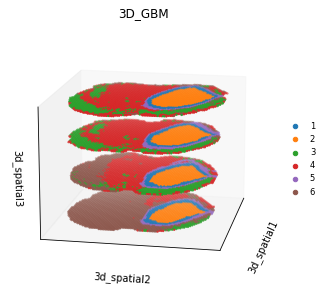

In [59]:
plt.rcParams["figure.figsize"] = (7, 5)
#ax.view_init(elev=15, azim=11)
ax=sc.pl.embedding(adata3, basis="3d_spatial",color='mclust',s=100,show=False
                   ,projection='3d',legend_fontsize='small',color_map=camp,title='3D_GBM')
ax.view_init(elev=15, azim=11)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])